In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_pickle("../Dados/TelecomX_tratado.pickle")

In [26]:
df.columns

Index(['customerID', 'customer.SeniorCitizen', 'customer.tenure',
       'account.Charges.Monthly', 'account.Charges.Total', 'Churn_Yes',
       'customer.gender_Female', 'customer.gender_Male', 'customer.Partner_No',
       'customer.Partner_Yes', 'customer.Dependents_No',
       'customer.Dependents_Yes', 'phone.PhoneService_No',
       'phone.PhoneService_Yes', 'phone.MultipleLines_No',
       'phone.MultipleLines_Yes', 'internet.InternetService_DSL',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_No', 'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_No', 'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_No', 'internet.DeviceProtection_Yes',
       'internet.TechSupport_No', 'internet.TechSupport_Yes',
       'internet.StreamingTV_No', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_No', 'internet.StreamingMovies_Yes',
       'account.Contract_Month-to-month', 'account.Contract_One y

In [27]:
correlation_yes = df.corr(numeric_only=True)['Churn_Yes'].sort_values(ascending=False)


In [28]:
correlation_yes

Churn_Yes                                          1.000000
account.Contract_Month-to-month                    0.395584
internet.InternetService_Fiber optic               0.300949
account.PaymentMethod_Electronic check             0.294626
account.Charges.Monthly                            0.189866
account.PaperlessBilling_Yes                       0.186666
internet.OnlineSecurity_No                         0.166828
customer.Dependents_No                             0.161384
internet.TechSupport_No                            0.160440
customer.Partner_No                                0.148546
customer.SeniorCitizen                             0.146733
internet.OnlineBackup_No                           0.080163
internet.DeviceProtection_No                       0.063452
internet.StreamingTV_Yes                           0.062430
internet.StreamingMovies_Yes                       0.060586
phone.MultipleLines_Yes                            0.039343
phone.PhoneService_Yes                  

In [29]:
limiar = 0.1  

correlation_yes = df.corr(numeric_only=True)['Churn_Yes'].sort_values(ascending=False)

colunas_significativas = correlation_yes[correlation_yes.abs() >= limiar].drop('Churn_Yes').index.tolist()

df_filtrado = df[colunas_significativas + ['Churn_Yes']] 

print(f"{len(colunas_significativas)} colunas mantidas com |correlação| ≥ {limiar}")


22 colunas mantidas com |correlação| ≥ 0.1


In [31]:
df_filtrado.to_pickle("../Dados/Telecom_Data_to_ML.pickle")

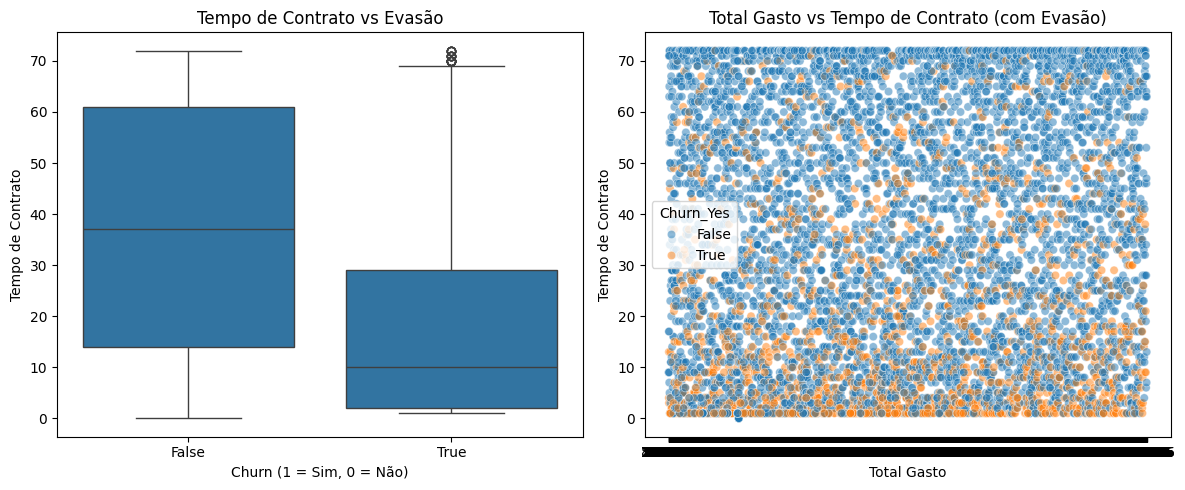

In [30]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn_Yes', y='customer.tenure', data=df)
plt.title('Tempo de Contrato vs Evasão')
plt.xlabel('Churn (1 = Sim, 0 = Não)')
plt.ylabel('Tempo de Contrato')

plt.subplot(1, 2, 2)
sns.scatterplot(x='account.Charges.Total', y='customer.tenure', hue='Churn_Yes', data=df, alpha=0.5)
plt.title('Total Gasto vs Tempo de Contrato (com Evasão)')
plt.xlabel('Total Gasto')
plt.ylabel('Tempo de Contrato')

plt.tight_layout()
plt.show()
